In [78]:
import numpy as np  # Importing NumPy library for numerical operations
import pandas as pd  # Importing Pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization
import seaborn as sns  # Importing Seaborn for statistical data visualization

In [79]:
import os
os.getcwd()

'c:\\Users\\LENOVO\\AppData\\Local\\Microsoft\\Windows\\INetCache\\IE\\WUY4HRQN'

In [80]:
# Load the dataset
df = pd.read_csv('C:\\Users\\LENOVO\\Dataset\\archive\\Heart_Disease_Prediction.csv')

In [81]:
# Display the first few rows of the dataframe
print(df.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results   
0   70    1                4  130          322             0            2  \
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST   
0     109                0            2.4            2  \
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [82]:
# Display summary statistics of the dataframe
describe_output = df.describe(include='all')
print(describe_output)

               Age         Sex  Chest pain type          BP  Cholesterol   
count   270.000000  270.000000       270.000000  270.000000   270.000000  \
unique         NaN         NaN              NaN         NaN          NaN   
top            NaN         NaN              NaN         NaN          NaN   
freq           NaN         NaN              NaN         NaN          NaN   
mean     54.433333    0.677778         3.174074  131.344444   249.659259   
std       9.109067    0.468195         0.950090   17.861608    51.686237   
min      29.000000    0.000000         1.000000   94.000000   126.000000   
25%      48.000000    0.000000         3.000000  120.000000   213.000000   
50%      55.000000    1.000000         3.000000  130.000000   245.000000   
75%      61.000000    1.000000         4.000000  140.000000   280.000000   
max      77.000000    1.000000         4.000000  200.000000   564.000000   

        FBS over 120  EKG results      Max HR  Exercise angina  ST depression   
count 

In [83]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [85]:
df.shape

(270, 14)

In [86]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [88]:
df.duplicated().sum()

0

In [89]:
# Seperate the data into dependent and independent variables
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

In [90]:
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (270, 13)
Shape of y:  (270,)


In [91]:
# Encode categorical variables using one-hot encoding
heart_disease_df_encoded = pd.get_dummies(df, columns=['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium'], drop_first=True)


In [92]:
# Separate features and target variable
X = heart_disease_df_encoded.drop('Heart Disease', axis=1)
y = heart_disease_df_encoded['Heart Disease']

In [93]:
# Normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [94]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [95]:
# Output the shape of the training and testing sets
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (216, 18)
Testing set shape: (54, 18)


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [97]:
# Initialize the logistic regression model
logreg = LogisticRegression()

In [98]:
# Fit the model to the training data
logreg.fit(X_train, y_train)

LogisticRegression()

In [99]:
# Predict on the testing data
y_pred = logreg.predict(X_test)

In [100]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8703703703703703


In [101]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

     Absence       0.84      0.97      0.90        33
    Presence       0.94      0.71      0.81        21

    accuracy                           0.87        54
   macro avg       0.89      0.84      0.86        54
weighted avg       0.88      0.87      0.87        54



In [102]:
# Since the dataset is already encoded and scaled, we will use the non-scaled version for better interpretability
# Select features for the pairplot and the target variable
features_to_plot = ['Age', 'BP', 'Cholesterol', 'Max HR', 'Heart Disease']
heart_disease_subset = df[features_to_plot]

In [103]:
# Convert 'Heart Disease' to a categorical type for better plotting
heart_disease_subset['Heart Disease'] = heart_disease_subset['Heart Disease'].astype('category')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11128\865381762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_subset['Heart Disease'] = heart_disease_subset['Heart Disease'].astype('category')


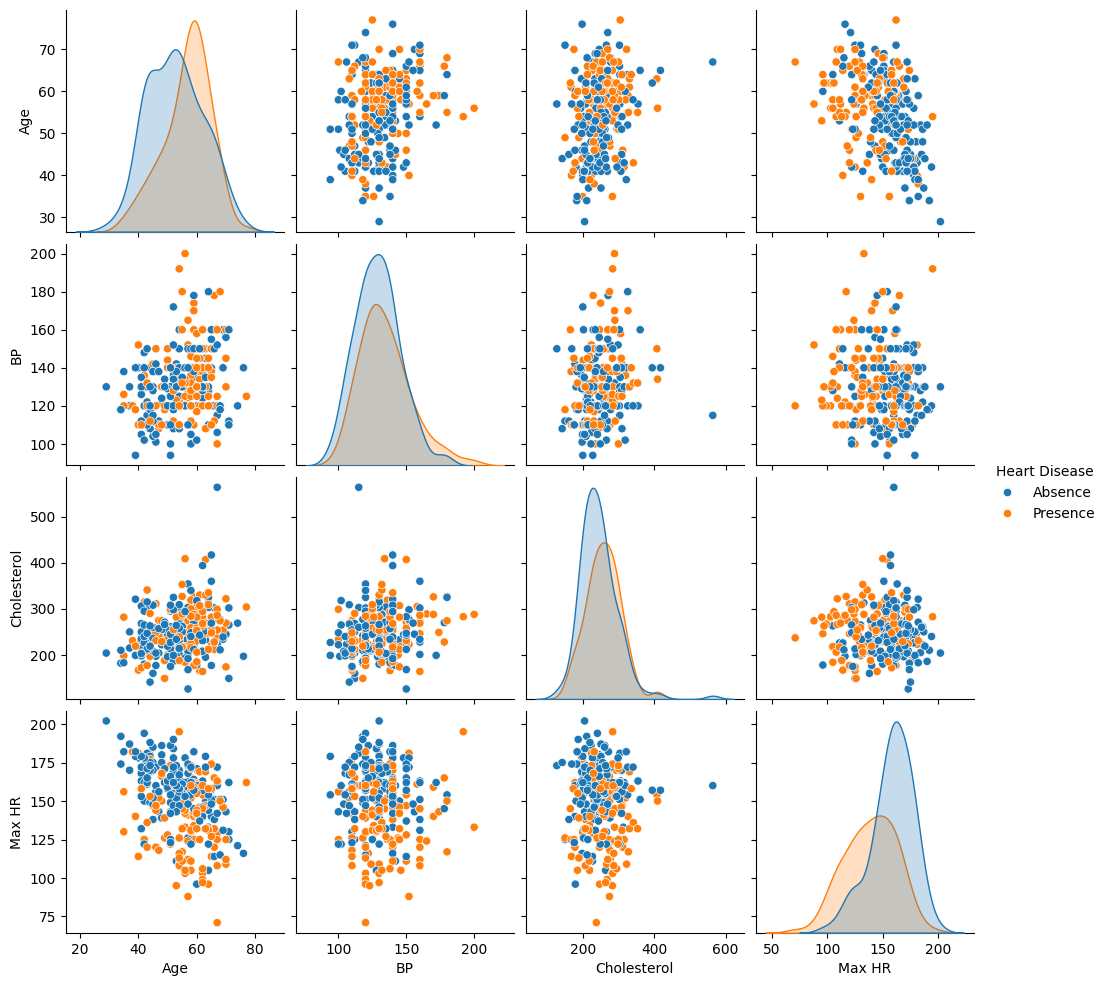

In [104]:
# Create a pairplot to visualize the relationships between features and the target variable
sns.pairplot(heart_disease_subset, hue='Heart Disease')
plt.show()